<h1><b>Análise exploratória de Dados</b></h1>

In [94]:
from google.colab import files
upload = files.upload()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_csv('Alesc_2019.csv', encoding='ISO-8859-1' ,sep=';')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11853 entries, 0 to 11852
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Verba       11853 non-null  object
 1   Descrição   11853 non-null  object
 2   Conta       11853 non-null  object
 3   Favorecido  9518 non-null   object
 4   Trecho      8309 non-null   object
 5   Vencimento  11853 non-null  object
 6   Valor       11853 non-null  object
dtypes: object(7)
memory usage: 648.3+ KB


<h1>Convertendo coluna para o tipo Data</h1>

In [6]:
dados['Vencimento'] = pd.to_datetime(dados['Vencimento'])

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11853 entries, 0 to 11852
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Verba       11853 non-null  object        
 1   Descrição   11853 non-null  object        
 2   Conta       11853 non-null  object        
 3   Favorecido  9518 non-null   object        
 4   Trecho      8309 non-null   object        
 5   Vencimento  11853 non-null  datetime64[ns]
 6   Valor       11853 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 648.3+ KB


<h2>Total de deputados no Dataset</h2>

In [8]:
total_deputados = len(dados['Conta'].unique())
total_deputados

61

<h2>Lista de Verbas no Dataset</h2>

In [9]:
verbas = dados.Verba.unique()
for v in verbas:
  print(v)

ALMOXARIFADO
COMBUSTÍVEIS
Correspondência / Telegrama
DIÁRIAS
GRÁFICA
INSCRIÇÃO
PASSAGENS
TELEFONE
VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR


### Convertendo campo object para float

In [10]:
dados['Valor'] = dados['Valor'].apply(lambda x: x.replace('.',''))

In [11]:
dados['Valor'] = dados['Valor'].apply(lambda x: x.replace(',','.'))

In [12]:
dados['Valor'] = dados['Valor'].astype(float, errors='raise')

In [13]:
dados.dtypes

Verba                 object
Descrição             object
Conta                 object
Favorecido            object
Trecho                object
Vencimento    datetime64[ns]
Valor                float64
dtype: object

<h2>Relatório de percentual de deputados por verba</h2>

In [14]:
for v in verbas:
  qtd_deputados = round((len(dados[dados['Verba']==v]['Conta'].unique())/total_deputados)*100)
  print(f'{qtd_deputados}% gastam suas verbas com {v}')


67% gastam suas verbas com ALMOXARIFADO
44% gastam suas verbas com COMBUSTÍVEIS
70% gastam suas verbas com Correspondência / Telegrama
62% gastam suas verbas com DIÁRIAS
67% gastam suas verbas com GRÁFICA
25% gastam suas verbas com INSCRIÇÃO
64% gastam suas verbas com PASSAGENS
93% gastam suas verbas com TELEFONE
64% gastam suas verbas com VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR


<h2>Criando DataFrame com o total gasto por deputado em 2019 ordenado por valor</h2>

In [15]:
gastos_deputados = pd.DataFrame(dados.groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)
gastos_deputados

,Conta,Valor
37,Marcos Luiz Vieira,358112.13
39,Mauro de Nadal,341527.28
30,Kennedy Nunes,330851.10
21,Ismael dos Santos,321858.74
33,Luciane Carminatti,320664.04
...,...,...
51,Ricardo Guidi,265.51
58,Valmir Comin,229.62
5,Ana Paula de Lima,197.80
35,Manoel Mota,143.32


<h2>Criando gráfico de barras com valores gastos por deputados em 2019</h2>

Text(0.5, 1.0, 'Total de Gastos por deputado em 2019')

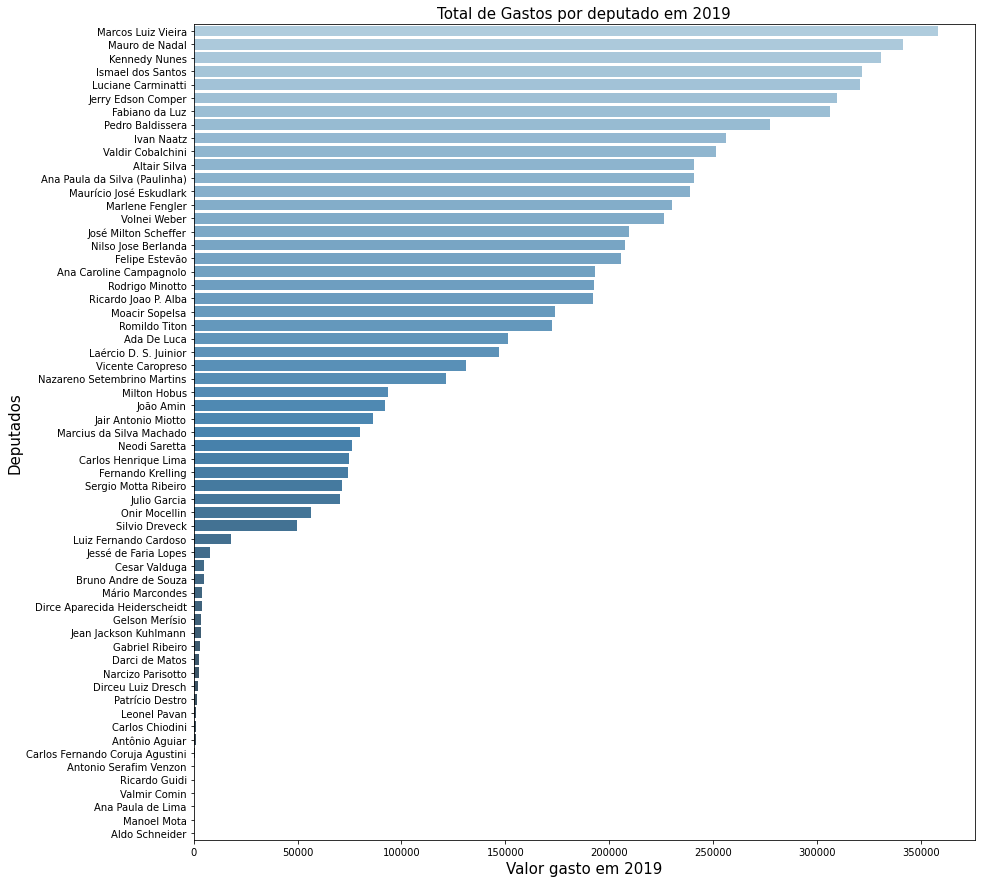

In [16]:
f, ax = plt.subplots(figsize=(14, 15))
"""sns.set_color_codes("pastel")"""
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_deputados,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor gasto em 2019', fontsize=15)
ax.set_title('Total de Gastos por deputado em 2019', fontsize=15)

<h2>Análise descritiva dos dados</h2>

In [17]:
gastos_deputados.describe().round(2)

,Valor
count,61.00
mean,118701.99
std,116557.62
min,130.75
25%,3374.93
50%,79935.20
75%,209753.69
max,358112.13


<h2>Análise descritiva dos dados de forma visual Boxplot</h2>

Text(0.5, 1.0, 'Demonstrativo de gastos do deputados')

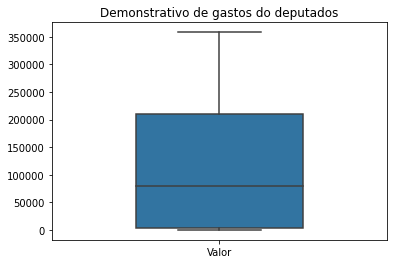

In [87]:
ax = sns.boxplot(data=gastos_deputados, width=0.5, orient='v')
ax.set_title('Demonstrativo de gastos do deputados')


<h2>Criando DataFrame do total agrupado por verba e ordenando por valor</h2>

In [19]:
total_verbas = pd.DataFrame(dados.groupby('Verba')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)
total_verbas

,Verba,Valor
3,DIÁRIAS,3836165.00
6,PASSAGENS,1077462.70
8,VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR,558105.11
7,TELEFONE,481265.10
0,ALMOXARIFADO,443036.99
1,COMBUSTÍVEIS,381376.40
2,Correspondência / Telegrama,345929.20
4,GRÁFICA,92006.60
5,INSCRIÇÃO,25474.00


<h2>Gráfico de barras demonstrando a verba mais utilizada em 2019</h2>

Text(0.5, 1.0, 'Total de Gastos por verba em 2019')

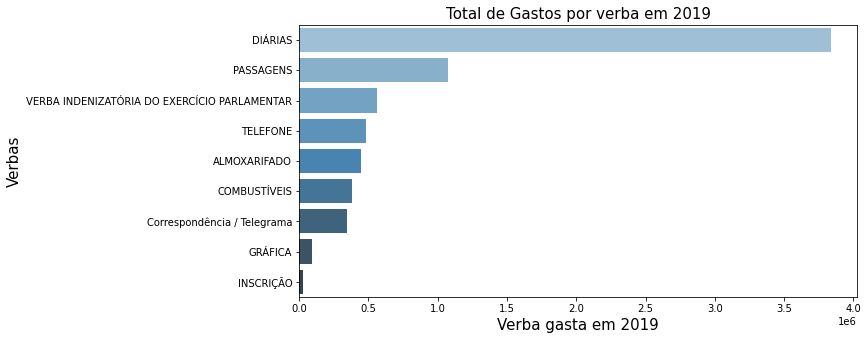

In [20]:
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="Valor", y="Verba",palette="Blues_d", data=total_verbas,
             color="b")
ax.set_ylabel('Verbas', fontsize=15)
ax.set_xlabel('Verba gasta em 2019', fontsize=15)
ax.set_title('Total de Gastos por verba em 2019', fontsize=15)

In [21]:
dados.groupby('Verba')['Valor'].count()

Verba
ALMOXARIFADO                                     464
COMBUSTÍVEIS                                     824
Correspondência / Telegrama                      363
DIÁRIAS                                         6200
GRÁFICA                                          302
INSCRIÇÃO                                         38
PASSAGENS                                       2071
TELEFONE                                        1014
VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR     577
Name: Valor, dtype: int64

#Análise dos gastos por Verba


In [22]:
dados['Verba'].unique()

array(['ALMOXARIFADO', 'COMBUSTÍVEIS', 'Correspondência / Telegrama',
       'DIÁRIAS', 'GRÁFICA', 'INSCRIÇÃO', 'PASSAGENS', 'TELEFONE',
       'VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR'], dtype=object)

##Gastos com Almoxarifado

In [23]:
gastos_almoxarifado = pd.DataFrame(dados[dados['Verba']=='ALMOXARIFADO'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


Text(0.5, 1.0, 'Total de Gastos com Almoxarifado em 2019')

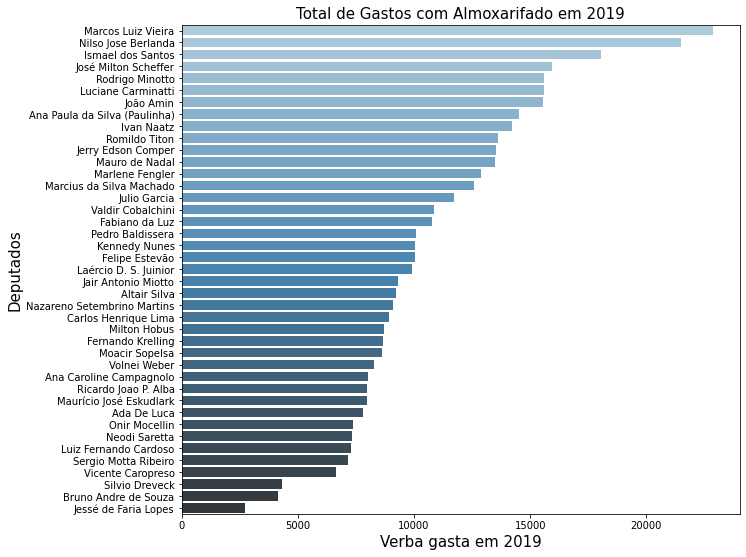

In [24]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_almoxarifado,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Verba gasta em 2019', fontsize=15)
ax.set_title('Total de Gastos com Almoxarifado em 2019', fontsize=15)

In [25]:
dados[dados['Verba']=='ALMOXARIFADO'].describe()

,Valor
count,464.000000
mean,954.821099
std,1132.891231
min,2.000000
25%,147.245000
50%,498.715000
75%,1292.115000
max,5302.120000


Text(0.5, 1.0, 'Demonstrativo gastos com Almoxarifado')

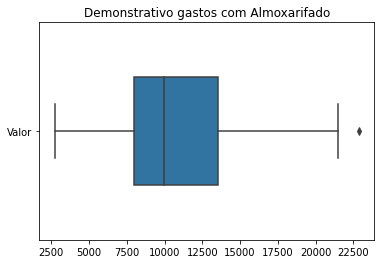

In [41]:

ax = sns.boxplot(data=gastos_almoxarifado, width=0.5, orient='h')
ax.set_title("Demonstrativo gastos com Almoxarifado")

##Gastos com COMBUSTÍVEIS

In [27]:
gastos_combustivel = pd.DataFrame(dados[dados['Verba']=='COMBUSTÍVEIS'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


Text(0.5, 1.0, 'Total de Gastos com combustível em 2019')

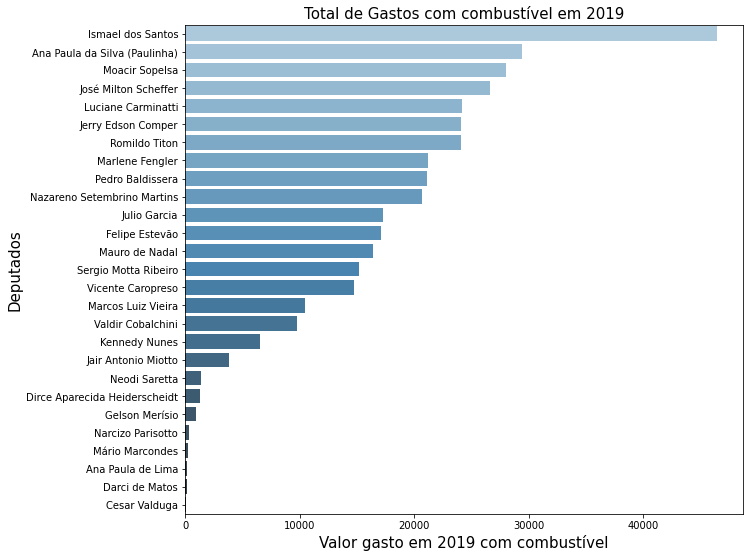

In [28]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_combustivel,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor gasto em 2019 com combustível', fontsize=15)
ax.set_title('Total de Gastos com combustível em 2019', fontsize=15)

In [29]:
gastos_combustivel.describe()


,Valor
count,27.000000
mean,14125.051852
std,12018.930752
min,64.220000
25%,1327.910000
50%,15161.660000
75%,22632.365000
max,46403.910000


Text(0.5, 1.0, 'Gastos com combustível')

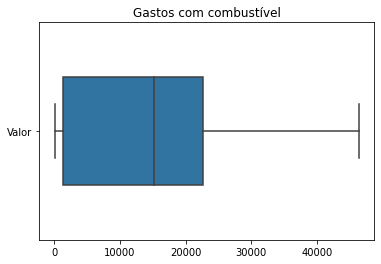

In [30]:
ax = sns.boxplot(data=gastos_combustivel, width=0.5, orient='h')
ax.set_title('Gastos com combustível')

##Gastos com Correspondência / Telegrama

<h2>Criando DataFrame com gastos com telegrama e correspondência</h2>

In [31]:
Gastos_Correspondência_Telegrama = pd.DataFrame(dados[dados['Verba']=='Correspondência / Telegrama'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


<h2>Gráfico de barras demonstrando os gastos com Correspondência / Telegrama por deputados em 2019</h2>

Text(0.5, 1.0, 'Total de Gastos com Correspondência / Telegrama em 2019')

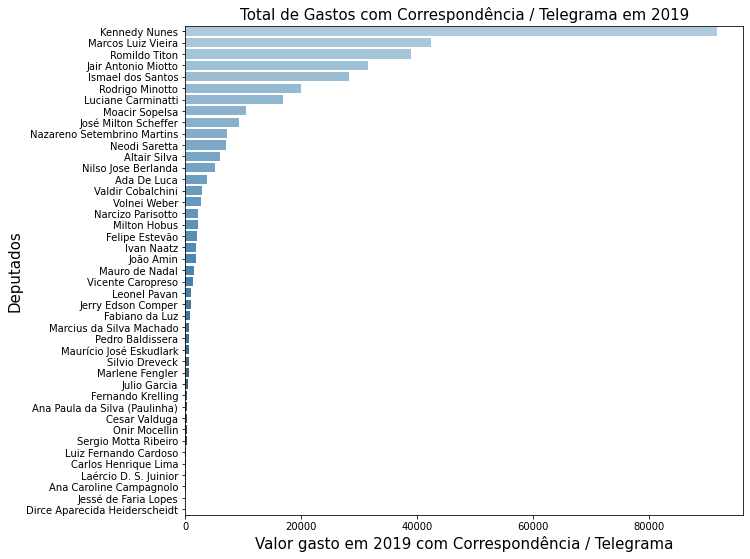

In [32]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=Gastos_Correspondência_Telegrama,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor gasto em 2019 com Correspondência / Telegrama', fontsize=15)
ax.set_title('Total de Gastos com Correspondência / Telegrama em 2019', fontsize=15)

In [33]:
Gastos_Correspondência_Telegrama.describe()

,Valor
count,43.000000
mean,8044.865116
std,16779.333155
min,18.390000
25%,461.620000
50%,1557.970000
75%,6543.995000
max,91649.040000


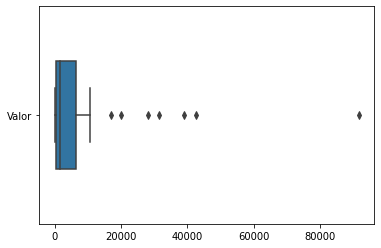

In [34]:
ax = sns.boxplot(data=Gastos_Correspondência_Telegrama, orient='h', width=0.5)

##Gastos com DIÁRIAS

In [35]:
Gastos_diaria = pd.DataFrame(dados[dados['Verba']=='DIÁRIAS'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)

<h2>Gráfico de barras demonstrando os gastos com diárias por deputado</h2>

Text(0.5, 1.0, 'Total de Gastos com Diárias em 2019')

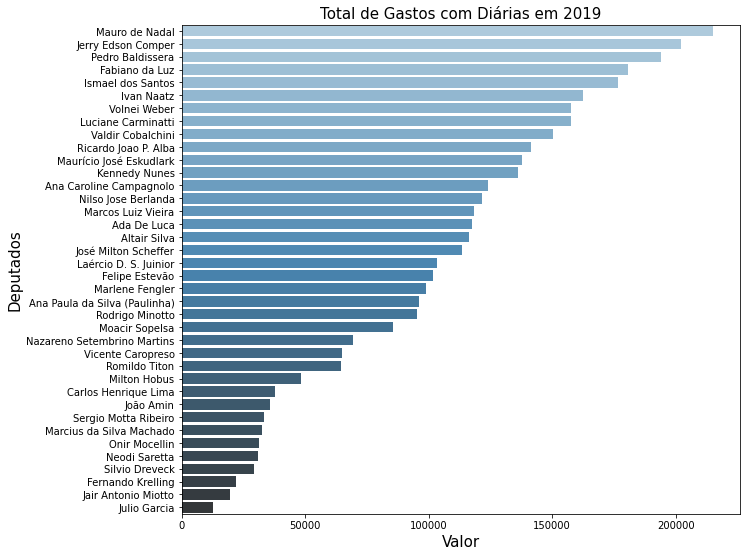

In [47]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=Gastos_diaria,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com Diárias em 2019', fontsize=15)

<h2>Análise descritiva</h2>

In [37]:
Gastos_diaria.describe()

,Valor
count,38.000000
mean,100951.710526
std,57558.923830
min,12600.000000
25%,40641.250000
50%,102457.500000
75%,140516.250000
max,215110.000000


<h2>Boxplot demonstrando os gastos com diárias</h2>

Text(0.5, 1.0, 'Boxplot gastos com Diárias')

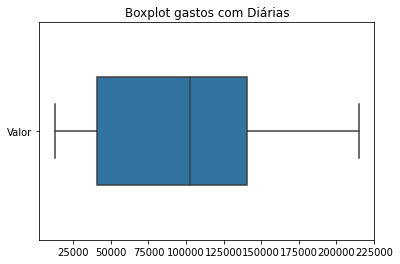

In [39]:
ax = sns.boxplot(data=Gastos_diaria, orient='h', width=0.5)
ax.set_title('Boxplot gastos com Diárias')

##Demonstrativo de gastos com GRÁFICA

In [44]:
Gastos_grafica = pd.DataFrame(dados[dados['Verba']=='GRÁFICA'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


Text(0.5, 1.0, 'Total de Gastos com Gráfica em 2019')

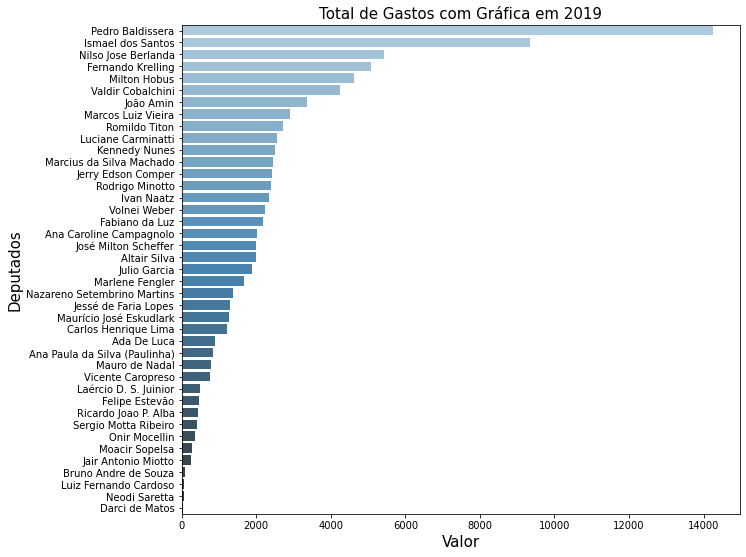

In [46]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=Gastos_grafica,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com Gráfica em 2019', fontsize=15)

In [48]:
Gastos_grafica.describe()

,Valor
count,41.000000
mean,2244.063415
std,2645.379786
min,49.000000
25%,482.400000
50%,1886.200000
75%,2494.500000
max,14251.200000


Text(0.5, 1.0, 'Demonstrativo de gastos com gráfica')

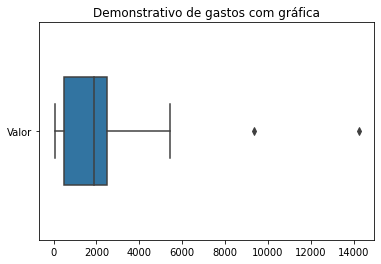

In [50]:
ax = sns.boxplot(data=Gastos_grafica, orient='h', width=0.5)
ax.set_title("Demonstrativo de gastos com gráfica")

##Gastos com INSCRIÇÃO

In [51]:
Gastos_inscricao = pd.DataFrame(dados[dados['Verba']=='INSCRIÇÃO'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


,Conta,Valor
5,Ivan Naatz,4041.0
6,Jerry Edson Comper,3870.0
0,Ada De Luca,2276.0
2,Ana Paula da Silva (Paulinha),2095.0
4,Ismael dos Santos,2057.0
13,Silvio Dreveck,1890.0
9,Milton Hobus,1754.0
12,Rodrigo Minotto,1754.0
11,Ricardo Joao P. Alba,1375.0
1,Altair Silva,1080.0


Text(0.5, 1.0, 'Total de Gastos com Inscrição em 2019')

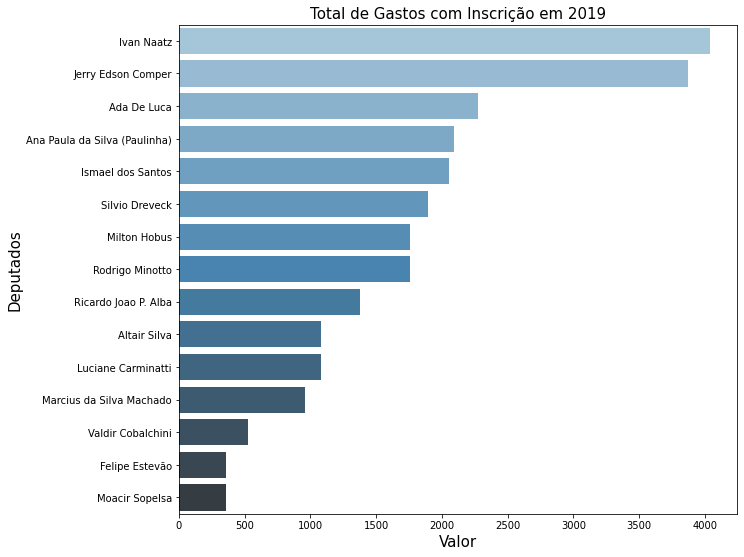

In [52]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=Gastos_inscricao,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com Inscrição em 2019', fontsize=15)

Text(0.5, 1.0, 'Demonstrativo de gastos com Inscrições em 2019')

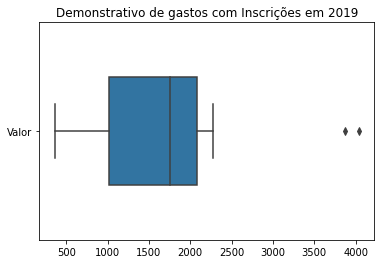

In [54]:
ax = sns.boxplot(data=Gastos_inscricao, orient='h', width=0.5)
ax.set_title("Demonstrativo de gastos com Inscrições em 2019")

##Demonstrativos de gastos PASSAGENS

In [80]:
gastos_passagens = pd.DataFrame(dados[dados['Verba']=='PASSAGENS'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)



Text(0.5, 1.0, 'Total de Gastos com Passagens em 2019')

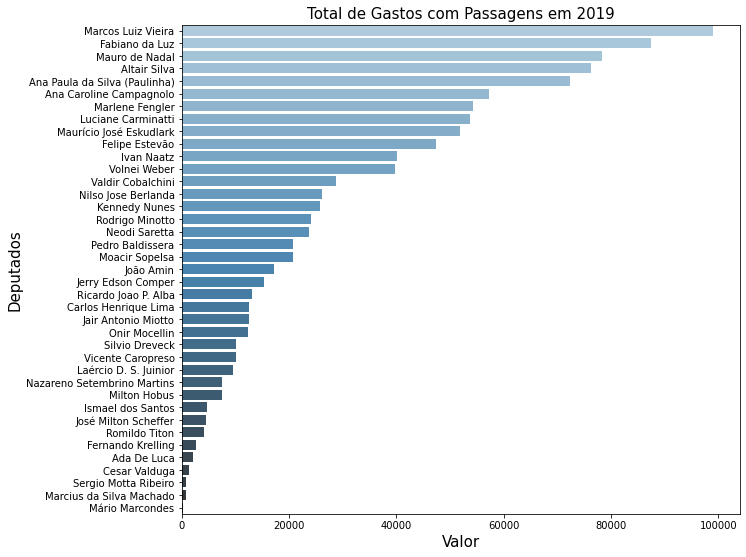

In [57]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_passagens,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com Passagens em 2019', fontsize=15)

In [77]:
gastos_passagens.describe()

,Valor
count,39.000000
mean,27627.248718
std,27101.825395
min,232.420000
25%,7593.895000
50%,17144.070000
75%,43736.110000
max,98986.150000


Text(0.5, 1.0, 'Demonstrativo de gastos com Passagens em 2019')

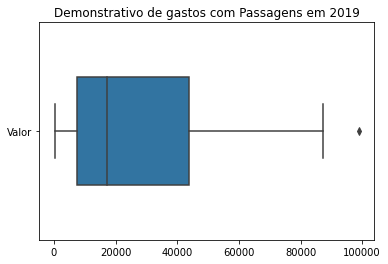

In [84]:
ax = sns.boxplot(data=gastos_passagens, orient='h', width=0.5)
ax.set_title("Demonstrativo de gastos com Passagens em 2019")

##Demonstrativo de gastos com TELEFONE

In [81]:
gastos_telefone = pd.DataFrame(dados[dados['Verba']=='PASSAGENS'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)

Text(0.5, 1.0, 'Total de Gastos com Telefone em 2019')

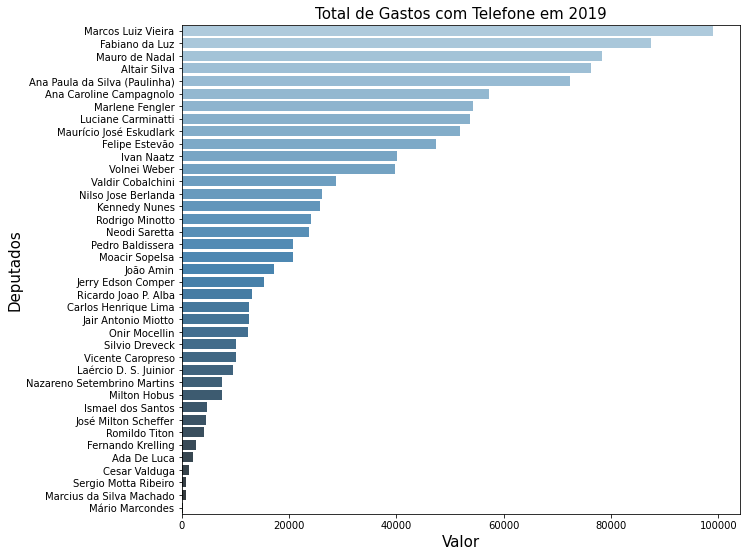

In [82]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_telefone,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com Telefone em 2019', fontsize=15)

In [89]:
gastos_telefone.describe()

,Valor
count,39.000000
mean,27627.248718
std,27101.825395
min,232.420000
25%,7593.895000
50%,17144.070000
75%,43736.110000
max,98986.150000


Text(0.5, 1.0, 'Demonstrativo de gastos com Telefones em 2019')

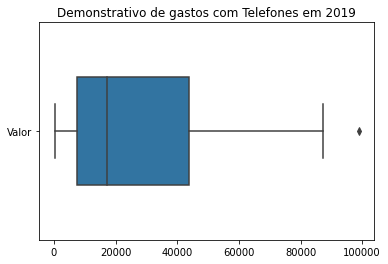

In [83]:
ax = sns.boxplot(data=gastos_telefone, orient='h', width=0.5)
ax.set_title("Demonstrativo de gastos com Telefones em 2019")

##Demonstrativo de gastos VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR

In [88]:
gastos_verbas_indenizatoria = pd.DataFrame(dados[dados['Verba']=='VERBA INDENIZATÓRIA DO EXERCÍCIO PARLAMENTAR'].groupby('Conta')['Valor'].sum()).reset_index().sort_values(by='Valor', ascending=False)


Text(0.5, 1.0, 'Total de Gastos com verba indenizatória em 2019')

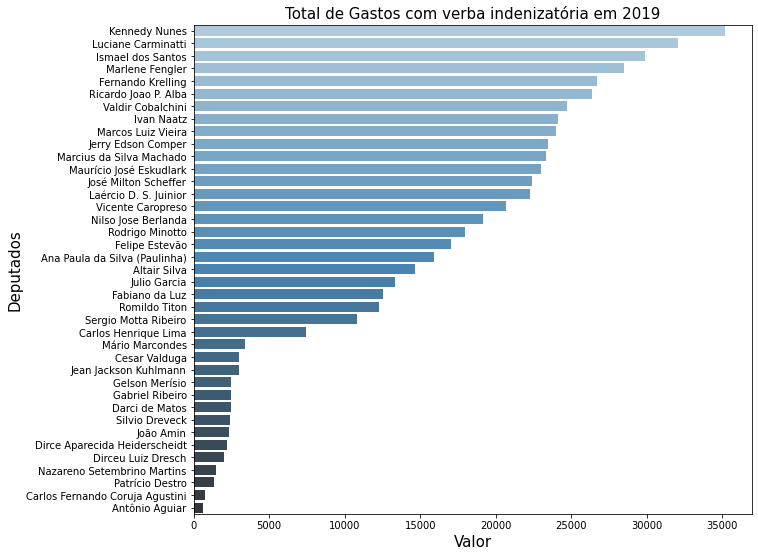

In [91]:
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x="Valor", y="Conta",palette="Blues_d", data=gastos_verbas_indenizatoria,
             color="b")
ax.set_ylabel('Deputados', fontsize=15)
ax.set_xlabel('Valor', fontsize=15)
ax.set_title('Total de Gastos com verba indenizatória em 2019', fontsize=15)

In [92]:
gastos_verbas_indenizatoria.describe()

,Valor
count,39.000000
mean,14310.387436
std,10761.425526
min,639.960000
25%,2500.000000
50%,14650.040000
75%,23423.945000
max,35204.460000


Text(0.5, 1.0, 'Demonstrativo de gastos com verba indenizatória em 2019')

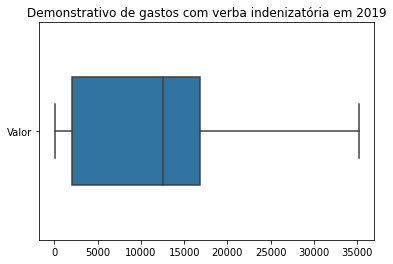

In [93]:
ax = sns.boxplot(data=gastos_verbas_indenizatoria.describe()
, orient='h', width=0.5)
ax.set_title("Demonstrativo de gastos com verba indenizatória em 2019")